# $(\Lambda_i, \delta_{ii})$ correlation

Go to [Index](response_Witz2019_index.ipynb).

In this notebook, we compare the $(\Lambda_i, \delta_{ii})$ correlation from experimental and simulation data to the theoretical values for both division-centric and replication-centric models, which should be zero.

All simulation files used here were produced by executing the notebook [response_Witz2019_simulations](response_Witz2019_simulations.ipynb).

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os, re, copy
import numpy as np
import pandas as pd
import scipy.stats as sst
import matplotlib.pyplot as plt
import matplotlib.colors as mco
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import matplotlib.gridspec as mgs
plt.rcParams['svg.fonttype'] = 'none'   # to export text as text, not curves
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('code')
from functions_response import plot_2varcorr_expsim, plot_2varcorr_overlay, process_df_SIM

In [3]:
# create/declare export directory for figures
fig_dir = os.path.join('figures','LAi_delta_ii_correlation')
if not os.path.isdir(fig_dir):
    os.makedirs(fig_dir)
    
# experimental files
direxp = os.path.join('.','experiments')

# simulation files produced for this response.
dirsimu = 'simulations'
if not os.path.isdir(dirsimu):
    raise ValueError("Directory doesn't exist:", dirsimu)
    
# select extensions for the figure output
ext_list = ['.png','.svg']

# fields to plot
field_x = 'Lambda_i'
field_y = 'delta_ii'
func_slope=None

## Analysis of data from Witz et al.

In [4]:
fpath_base = os.path.join(fig_dir,'witz')

names = [
         'glycerol', \
         'glycerolauto', \
         'glucose', \
         'glucose8aa' \
        ]

dataframes = []

for name in names:
    dataframes_dict = {}
    
    # experimental data
    fpath = os.path.join(direxp,name,'colidata.pkl')
    print(name, fpath)

    colidata = pd.read_pickle(fpath)
    
    ncells = len(colidata)
    print("ncells = {:d}".format(ncells))

    dataframes_dict['exp'] = colidata
    
    # simulations
    ## simulations with asymmetrical division
    fpath = os.path.join(dirsimu, '{:s}_standard_N5T200000.pkl'.format(name))
    print(name, fpath)

    colidata = pd.read_pickle(fpath)
    colidata = process_df_SIM(colidata)
    colidata.rename(columns={'LAi': 'Lambda_i', 'Lb': 'Sb', 'Ld': 'Sd', 'dLi': 'delta_ii', 'dLdLi': 'delta_id'}, inplace=True)
    dataframes_dict['sim asym'] = colidata
    
    ncells = len(colidata)
    print("ncells = {:d}".format(ncells))
    
    ## simulations with symmetrical division
    fpath = os.path.join(dirsimu, '{:s}_symmetrical_N5T200000.pkl'.format(name))
    print(name, fpath)

    colidata = pd.read_pickle(fpath)
    colidata = process_df_SIM(colidata)
    colidata.rename(columns={'LAi': 'Lambda_i', 'Lb': 'Sb', 'Ld': 'Sd', 'dLi': 'delta_ii', 'dLdLi': 'delta_id'}, inplace=True)
    dataframes_dict['sim sym'] = colidata
    
    ncells = len(colidata)
    print("ncells = {:d}".format(ncells))
    
    dataframes.append(dataframes_dict)
                              
    print("")
    
    

glycerol ./experiments/glycerol/colidata.pkl
ncells = 865
glycerol simulations/glycerol_standard_N5T200000.pkl
ncells = 11034
glycerol simulations/glycerol_symmetrical_N5T200000.pkl
ncells = 10997

glycerolauto ./experiments/glycerolauto/colidata.pkl
ncells = 3018
glycerolauto simulations/glycerolauto_standard_N5T200000.pkl
ncells = 11524
glycerolauto simulations/glycerolauto_symmetrical_N5T200000.pkl
ncells = 11436

glucose ./experiments/glucose/colidata.pkl
ncells = 1094
glucose simulations/glucose_standard_N5T200000.pkl
ncells = 18719
glucose simulations/glucose_symmetrical_N5T200000.pkl
ncells = 18579

glucose8aa ./experiments/glucose8aa/colidata.pkl
ncells = 1251
glucose8aa simulations/glucose8aa_standard_N5T200000.pkl
ncells = 24094
glucose8aa simulations/glucose8aa_symmetrical_N5T200000.pkl
ncells = 24052



In [5]:
binw = 0.05
# binw = None
# x0=0.7
x0 = 0.5
# x1=1.4
x1 = 1.5
xlo=0.5
xhi=1.5
ylo=0.5
yhi=1.5
figsize=(12,3)

fig = plot_2varcorr_expsim(dataframes, names, field_x = field_x, field_y = field_y, \
                           binw_dict=binw, x0=x0, x1=x1, func_slope=func_slope, \
                          xlo=xlo, xhi=xhi, ylo=ylo, yhi=yhi, figsize=figsize)

fname = "LAi_delta_ii_expsim"
fpath = "{:s}_{:s}".format(fpath_base, fname)
for ext in ext_list:
    fig.savefig(fpath+ext, dpi=300, bbox_inches='tight', pad_inches=0)
    print("Saved figure in {:s}".format(fpath+ext))
#     fig.clf()
plt.close('all')

glycerol
exp
sim asym
sim sym
glycerolauto
exp
sim asym
sim sym
glucose
exp
sim asym
sim sym
glucose8aa
exp
sim asym
sim sym
Saved figure in figures/LAi_delta_ii_correlation/witz_LAi_delta_ii_expsim.png
Saved figure in figures/LAi_delta_ii_correlation/witz_LAi_delta_ii_expsim.svg


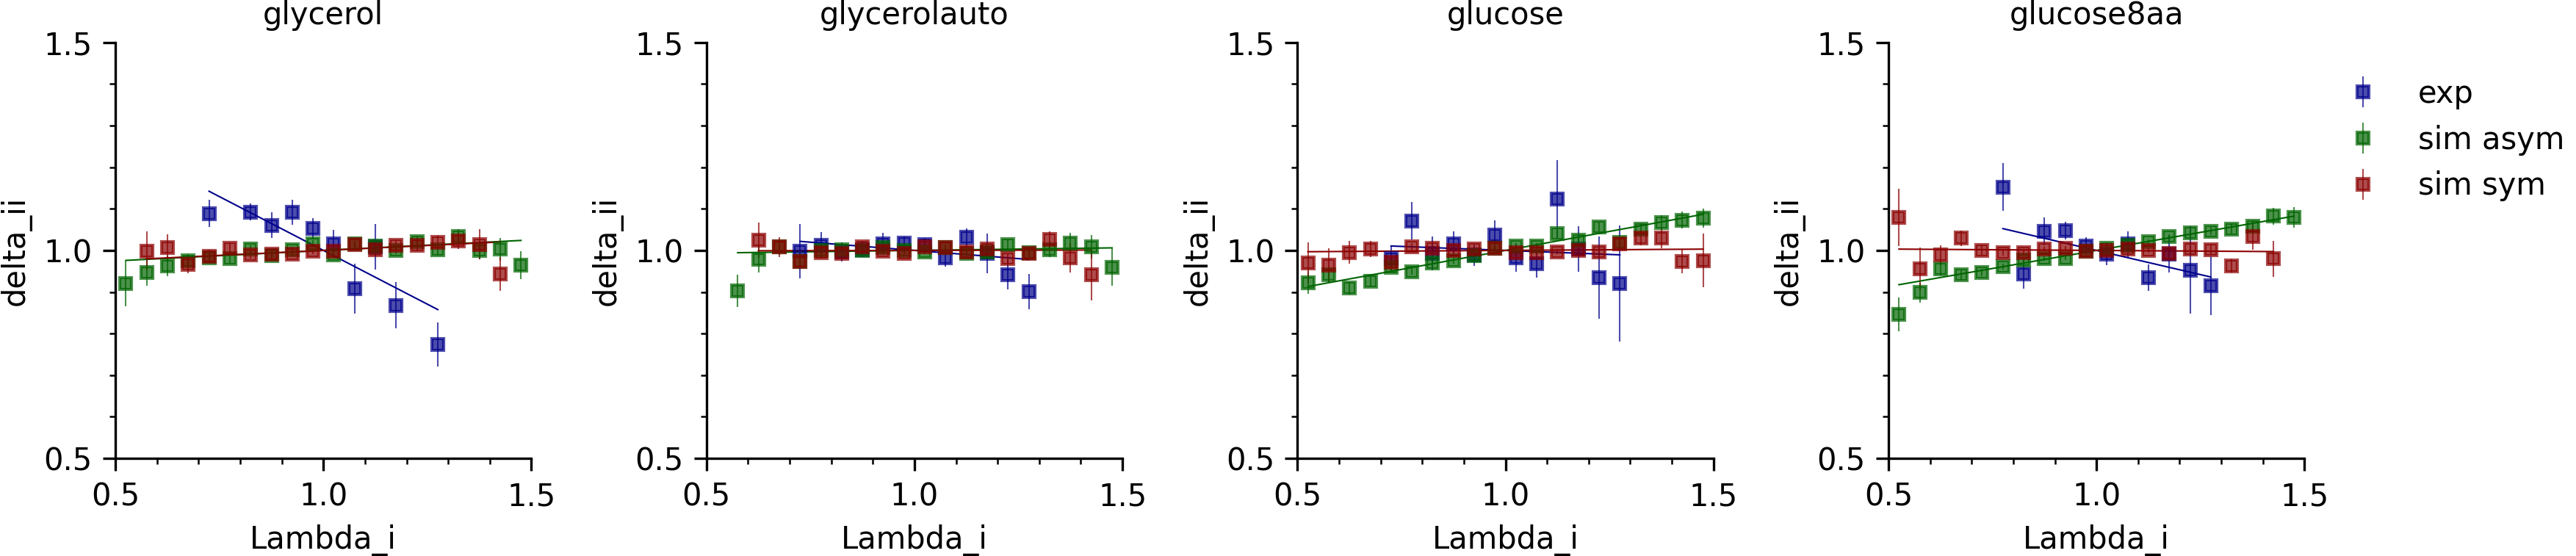

In [6]:
# display one of the previous figures
Image(filename=fpath+'.png') 

## Analysis of data from Si & Le Treut et al.

In [7]:
fpath_base = os.path.join(fig_dir,'fsglt')

names = [ \
         'mg1655_acetate', \
         'mg1655_glucose', \
         'mg1655_glycerol11aa', \
         'ncm3722_arginine', \
         'ncm3722_glucose', \
         'ncm3722_glucose12aa'
        ]

dataframes = []

for name in names:
    dataframes_dict = {}
    
    # experimental data
    fpath = os.path.join(direxp,name,'colidata.pkl')
    print(name, fpath)

    colidata = pd.read_pickle(fpath)

    ncells = len(colidata)
    print("ncells = {:d}".format(ncells))

    dataframes_dict['exp'] = colidata
    
    # simulations
    ## simulations with asymmetrical division
    fpath = os.path.join(dirsimu, '{:s}_standard_N5T200000.pkl'.format(name))
    print(name, fpath)

    colidata = pd.read_pickle(fpath)
    colidata = process_df_SIM(colidata)
    colidata.rename(columns={'LAi': 'Lambda_i', 'Lb': 'Sb', 'Ld': 'Sd', 'dLi': 'delta_ii', 'dLdLi': 'delta_id'}, inplace=True)
    dataframes_dict['sim asym'] = colidata
    
    ncells = len(colidata)
    print("ncells = {:d}".format(ncells))
    
    ## simulations with symmetrical division
    fpath = os.path.join(dirsimu, '{:s}_symmetrical_N5T200000.pkl'.format(name))
    print(name, fpath)

    colidata = pd.read_pickle(fpath)
    colidata = process_df_SIM(colidata)
    colidata.rename(columns={'LAi': 'Lambda_i', 'Lb': 'Sb', 'Ld': 'Sd', 'dLi': 'delta_ii', 'dLdLi': 'delta_id'}, inplace=True)
    dataframes_dict['sim sym'] = colidata
    
    ncells = len(colidata)
    print("ncells = {:d}".format(ncells))
    
    dataframes.append(dataframes_dict)
                              
    print("")

mg1655_acetate ./experiments/mg1655_acetate/colidata.pkl
ncells = 1554
mg1655_acetate simulations/mg1655_acetate_standard_N5T200000.pkl
ncells = 5075
mg1655_acetate simulations/mg1655_acetate_symmetrical_N5T200000.pkl
ncells = 5050

mg1655_glucose ./experiments/mg1655_glucose/colidata.pkl
ncells = 1807
mg1655_glucose simulations/mg1655_glucose_standard_N5T200000.pkl
ncells = 18225
mg1655_glucose simulations/mg1655_glucose_symmetrical_N5T200000.pkl
ncells = 18133

mg1655_glycerol11aa ./experiments/mg1655_glycerol11aa/colidata.pkl
ncells = 1491
mg1655_glycerol11aa simulations/mg1655_glycerol11aa_standard_N5T200000.pkl
ncells = 12599
mg1655_glycerol11aa simulations/mg1655_glycerol11aa_symmetrical_N5T200000.pkl
ncells = 12533

ncm3722_arginine ./experiments/ncm3722_arginine/colidata.pkl
ncells = 1701
ncm3722_arginine simulations/ncm3722_arginine_standard_N5T200000.pkl
ncells = 8757
ncm3722_arginine simulations/ncm3722_arginine_symmetrical_N5T200000.pkl
ncells = 8755

ncm3722_glucose ./expe

In [8]:
binw = 0.05
# binw = None
# x0=0.7
x0 = 0.5
# x1=1.4
x1 = 1.5
xlo=0.5
xhi=1.5
ylo=0.5
yhi=1.5
figsize=(18,3)

fig = plot_2varcorr_expsim(dataframes, names, field_x = field_x, field_y = field_y, \
                           binw_dict=binw, x0=x0, x1=x1, func_slope=func_slope, \
                          xlo=xlo, xhi=xhi, ylo=ylo, yhi=yhi, figsize=figsize)

fname = "LAi_delta_ii_expsim"
fpath = "{:s}_{:s}".format(fpath_base, fname)
for ext in ext_list:
    fig.savefig(fpath+ext, dpi=300, bbox_inches='tight', pad_inches=0)
    print("Saved figure in {:s}".format(fpath+ext))
#     fig.clf()
plt.close('all')

mg1655_acetate
exp
sim asym
sim sym
mg1655_glucose
exp
sim asym
sim sym
mg1655_glycerol11aa
exp
sim asym
sim sym
ncm3722_arginine
exp
sim asym
sim sym
ncm3722_glucose
exp
sim asym
sim sym
ncm3722_glucose12aa
exp
sim asym
sim sym
Saved figure in figures/LAi_delta_ii_correlation/fsglt_LAi_delta_ii_expsim.png
Saved figure in figures/LAi_delta_ii_correlation/fsglt_LAi_delta_ii_expsim.svg


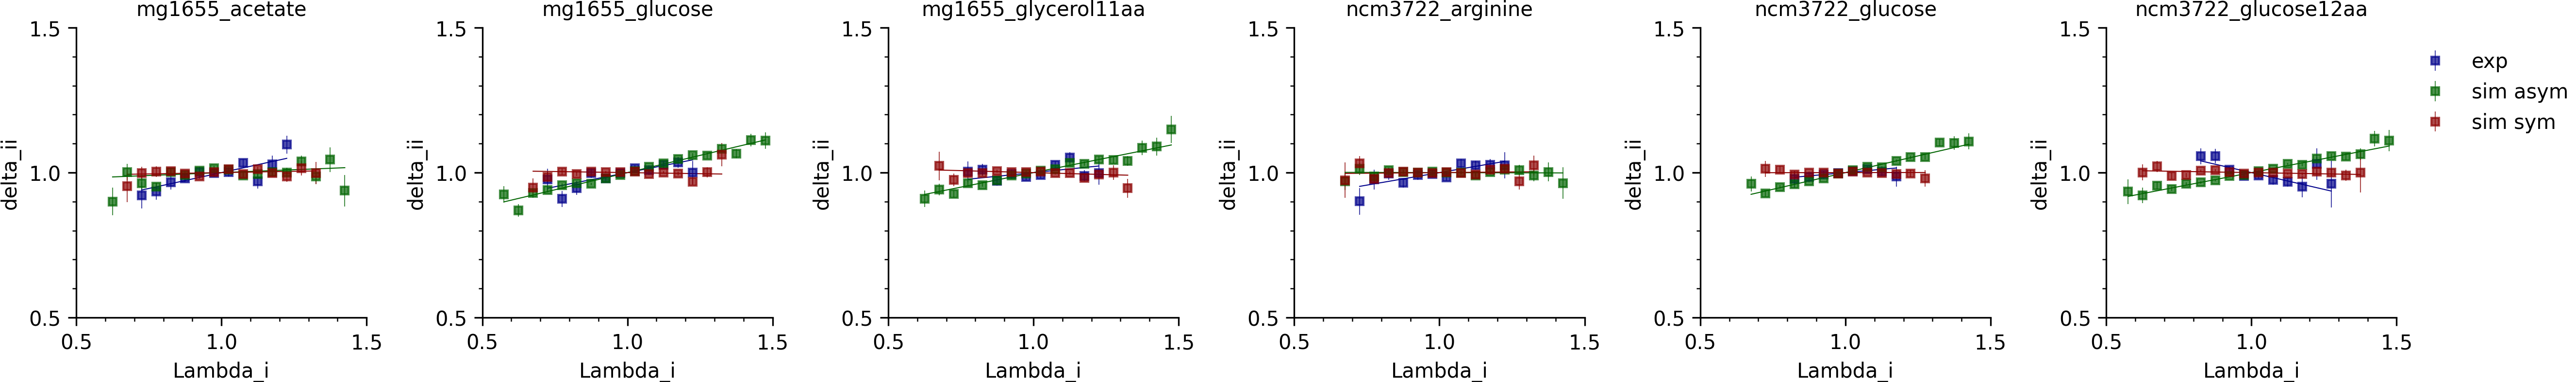

In [9]:
# display one of the previous figures
Image(filename=fpath+'.png') 

## Overlay plots for several conditions

We are using experimental data from:
* Si & Le Treut et al (2019) [10.1016/j.cub.2019.04.062](https://doi.org/10.1016/j.cub.2019.04.062)
* Witz et al (2019) [10.7554/eLife.48063](https://doi.org/10.7554/eLife.48063)
* Le Treut & Si & Li et al(2020) [10.1101/2020.05.08.084376](https://doi.org/10.1101/2020.05.08.084376)

### Plot MG

In [10]:
fpath_base = os.path.join(fig_dir,'mg')

names = [ \
         'mg1655_acetate', \
         'mg1655_glucose', \
         'mg1655_glycerol11aa', \
         'mg1655_acetate_uracil' , \
         'mg1655_glycerol6aa_uracil', \
         'mg1655_glucose_uracil', \
        ]

dataframes = []
for name in names:
    fpath = os.path.join(direxp,name,'colidata.pkl')
    colidata = pd.read_pickle(fpath)

    colidata['lambda'] = colidata['lambda']*60
    ncells = len(colidata)
    print("ncells = {:d}".format(ncells))

    dataframes.append(colidata)
    

ncells = 1554
ncells = 1807
ncells = 1491
ncells = 219
ncells = 248
ncells = 328


In [11]:
binw = 0.05
x0 = 0.5
x1 = 1.5
figsize=(8,3)
ms=4
show='all'

fig=plot_2varcorr_overlay(dataframes, names, field_x=field_x, field_y=field_y, \
                          figsize=figsize, normalize=True, show=show, \
                                  binw_dict=binw, x0=x0, x1=x1, ms=ms)

fname = "LAi_delta_ii_overlay_{:s}".format(show)
fpath = "{:s}_{:s}".format(fpath_base, fname)
for ext in ext_list:
    fig.savefig(fpath+ext, dpi=300, bbox_inches='tight', pad_inches=0)
    print("Saved figure in {:s}".format(fpath+ext))
#     fig.clf()
plt.close('all')

binw = 0.0500
binw = 0.0500
binw = 0.0500
binw = 0.0500
binw = 0.0500
binw = 0.0500
Saved figure in figures/LAi_delta_ii_correlation/mg_LAi_delta_ii_overlay_all.png
Saved figure in figures/LAi_delta_ii_correlation/mg_LAi_delta_ii_overlay_all.svg


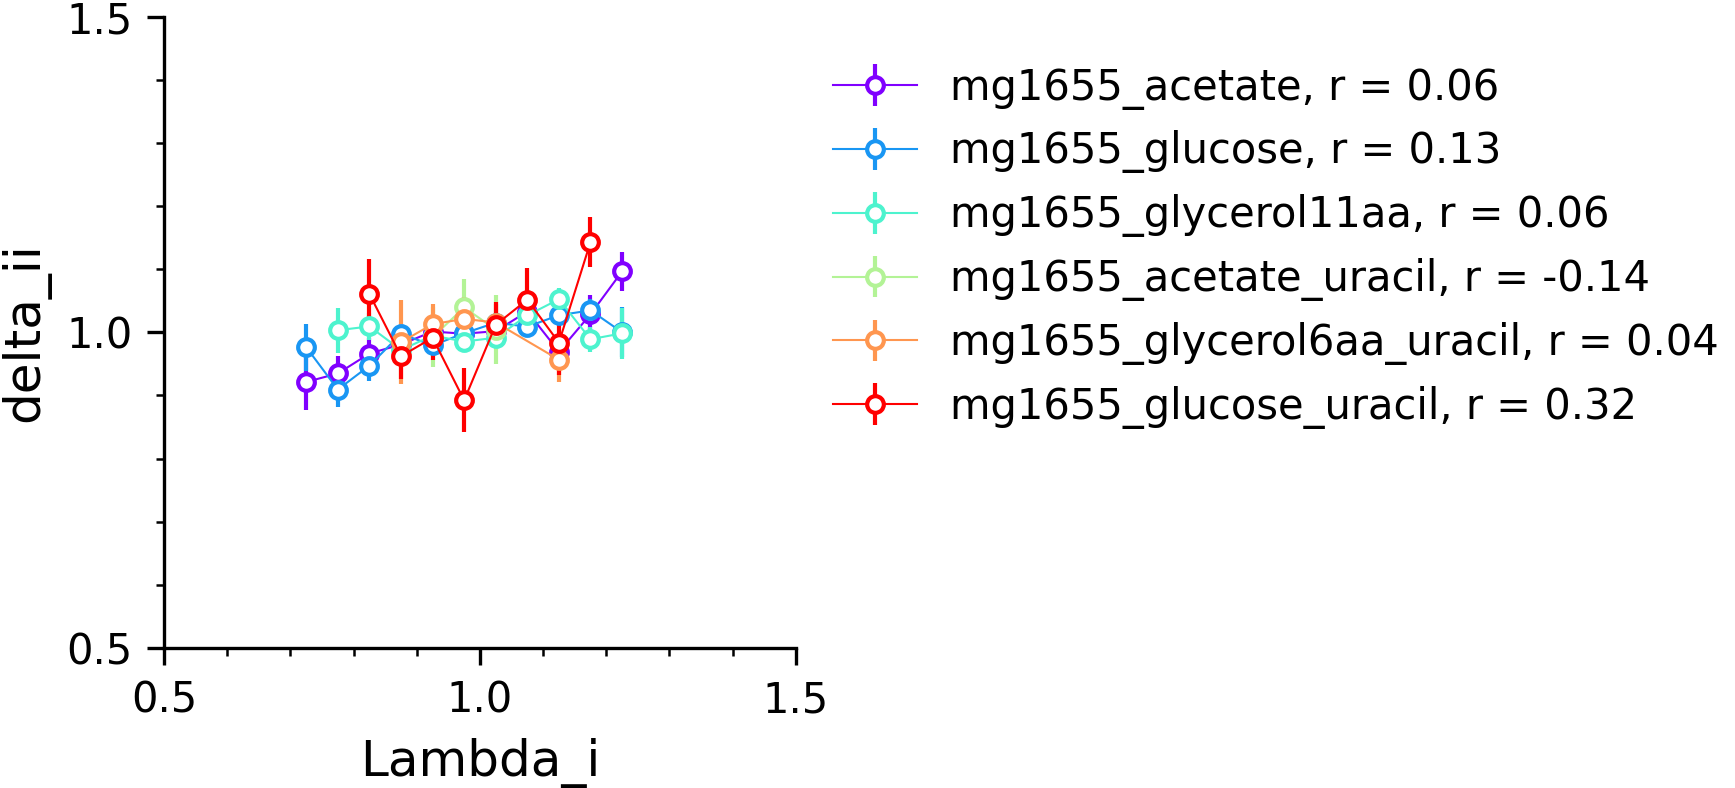

In [12]:
# display one of the previous figures
Image(filename=fpath+'.png') 

In [13]:
binw = 0.05
x0 = 0.5
x1 = 1.5
figsize=(8,3)
ms=4
show='left'

fig=plot_2varcorr_overlay(dataframes, names, field_x=field_x, field_y=field_y, \
                          figsize=figsize, normalize=True, show=show, \
                                  binw_dict=binw, x0=x0, x1=x1, ms=ms)

fname = "LAi_delta_ii_overlay_{:s}".format(show)
fpath = "{:s}_{:s}".format(fpath_base, fname)
for ext in ext_list:
    fig.savefig(fpath+ext, dpi=300, bbox_inches='tight', pad_inches=0)
    print("Saved figure in {:s}".format(fpath+ext))
#     fig.clf()
plt.close('all')

binw = 0.0500
binw = 0.0500
binw = 0.0500
binw = 0.0500
binw = 0.0500
binw = 0.0500
Saved figure in figures/LAi_delta_ii_correlation/mg_LAi_delta_ii_overlay_left.png
Saved figure in figures/LAi_delta_ii_correlation/mg_LAi_delta_ii_overlay_left.svg


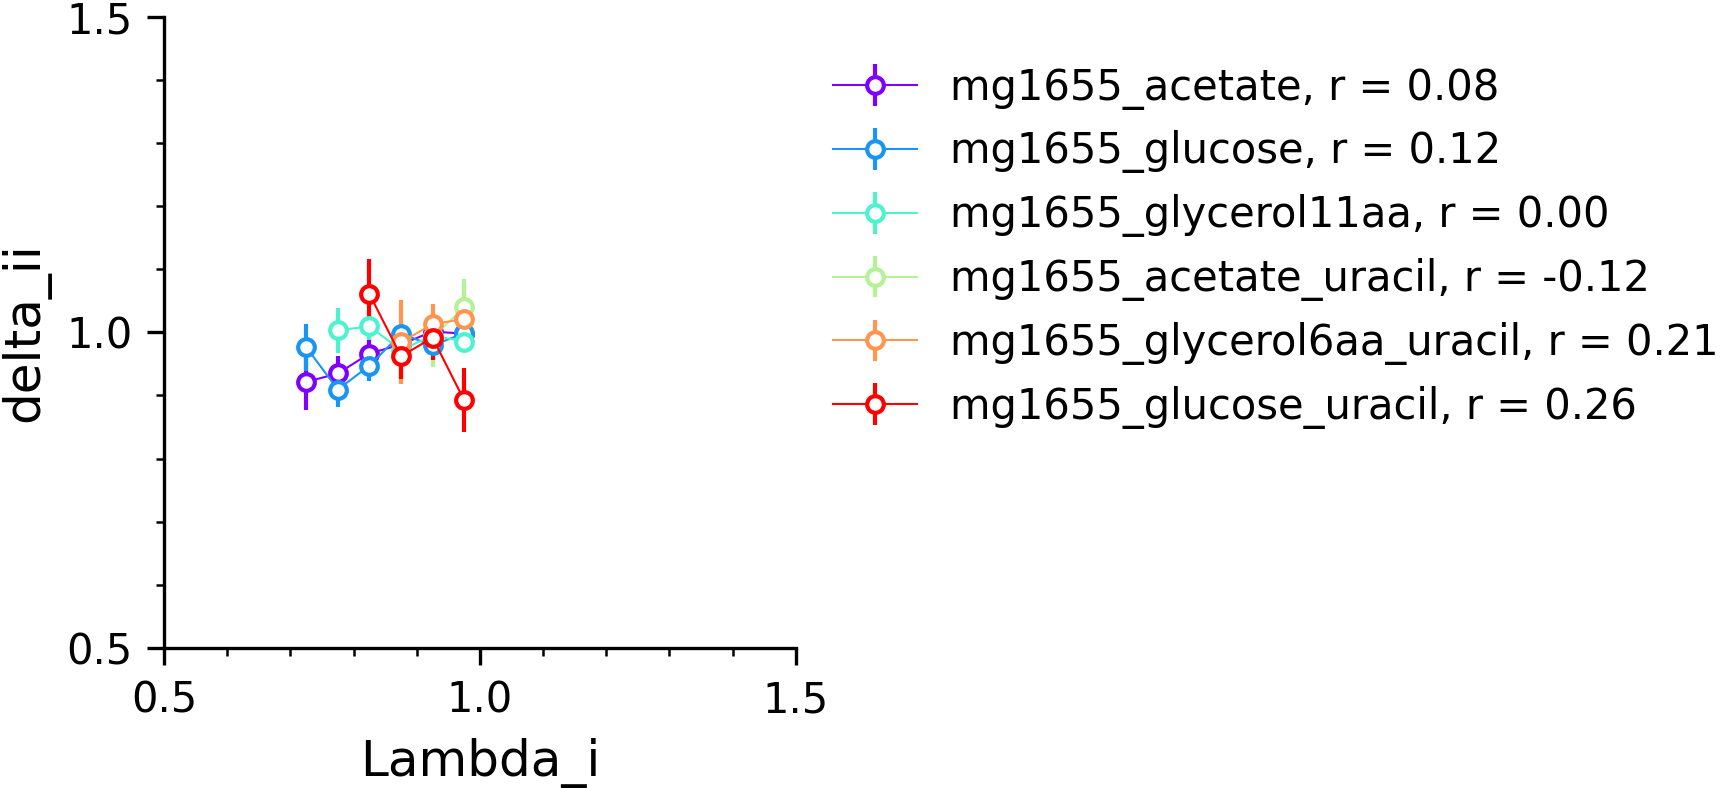

In [14]:
# display one of the previous figures
Image(filename=fpath+'.png') 

In [15]:
binw = 0.05
x0 = 0.5
x1 = 1.5
figsize=(8,3)
ms=4
show='right'

fig=plot_2varcorr_overlay(dataframes, names, field_x=field_x, field_y=field_y, \
                          figsize=figsize, normalize=True, show=show, \
                                  binw_dict=binw, x0=x0, x1=x1, ms=ms)

fname = "LAi_delta_ii_overlay_{:s}".format(show)
fpath = "{:s}_{:s}".format(fpath_base, fname)
for ext in ext_list:
    fig.savefig(fpath+ext, dpi=300, bbox_inches='tight', pad_inches=0)
    print("Saved figure in {:s}".format(fpath+ext))
#     fig.clf()
plt.close('all')

binw = 0.0500
binw = 0.0500
binw = 0.0500
binw = 0.0500
binw = 0.0500
binw = 0.0500
Saved figure in figures/LAi_delta_ii_correlation/mg_LAi_delta_ii_overlay_right.png
Saved figure in figures/LAi_delta_ii_correlation/mg_LAi_delta_ii_overlay_right.svg


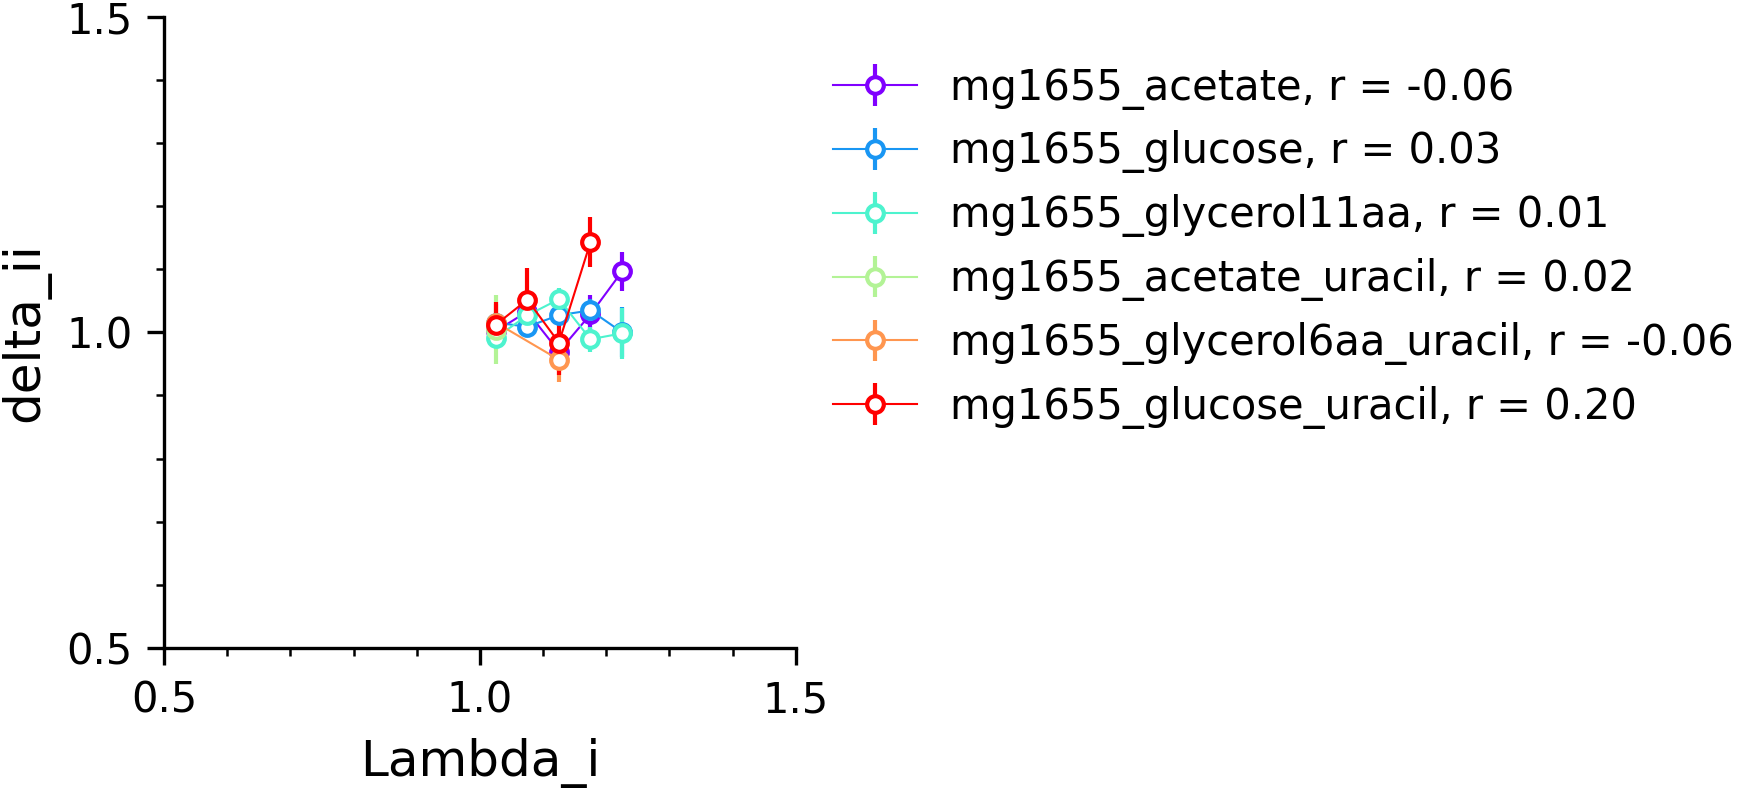

In [16]:
# display one of the previous figures
Image(filename=fpath+'.png') 

### Plot NCM

In [17]:
fpath_base = os.path.join(fig_dir,'ncm')

names = [ \
         'ncm3722_arginine', \
         'ncm3722_glucose', \
         'ncm3722_glucose12aa', \
        ]

dataframes = []
for name in names:
    fpath = os.path.join(direxp,name,'colidata.pkl')
    colidata = pd.read_pickle(fpath)

    colidata['lambda'] = colidata['lambda']*60
    ncells = len(colidata)
    print("ncells = {:d}".format(ncells))

    dataframes.append(colidata)
    

ncells = 1701
ncells = 1432
ncells = 1464


In [18]:
binw = 0.05
x0 = 0.5
x1 = 1.5
figsize=(8,3)
ms=4
show='all'

fig=plot_2varcorr_overlay(dataframes, names, field_x=field_x, field_y=field_y, \
                          figsize=figsize, normalize=True, show=show, \
                                  binw_dict=binw, x0=x0, x1=x1, ms=ms)

fname = "LAi_delta_ii_overlay_{:s}".format(show)
fpath = "{:s}_{:s}".format(fpath_base, fname)
for ext in ext_list:
    fig.savefig(fpath+ext, dpi=300, bbox_inches='tight', pad_inches=0)
    print("Saved figure in {:s}".format(fpath+ext))
#     fig.clf()
plt.close('all')

binw = 0.0500
binw = 0.0500
binw = 0.0500
Saved figure in figures/LAi_delta_ii_correlation/ncm_LAi_delta_ii_overlay_all.png
Saved figure in figures/LAi_delta_ii_correlation/ncm_LAi_delta_ii_overlay_all.svg


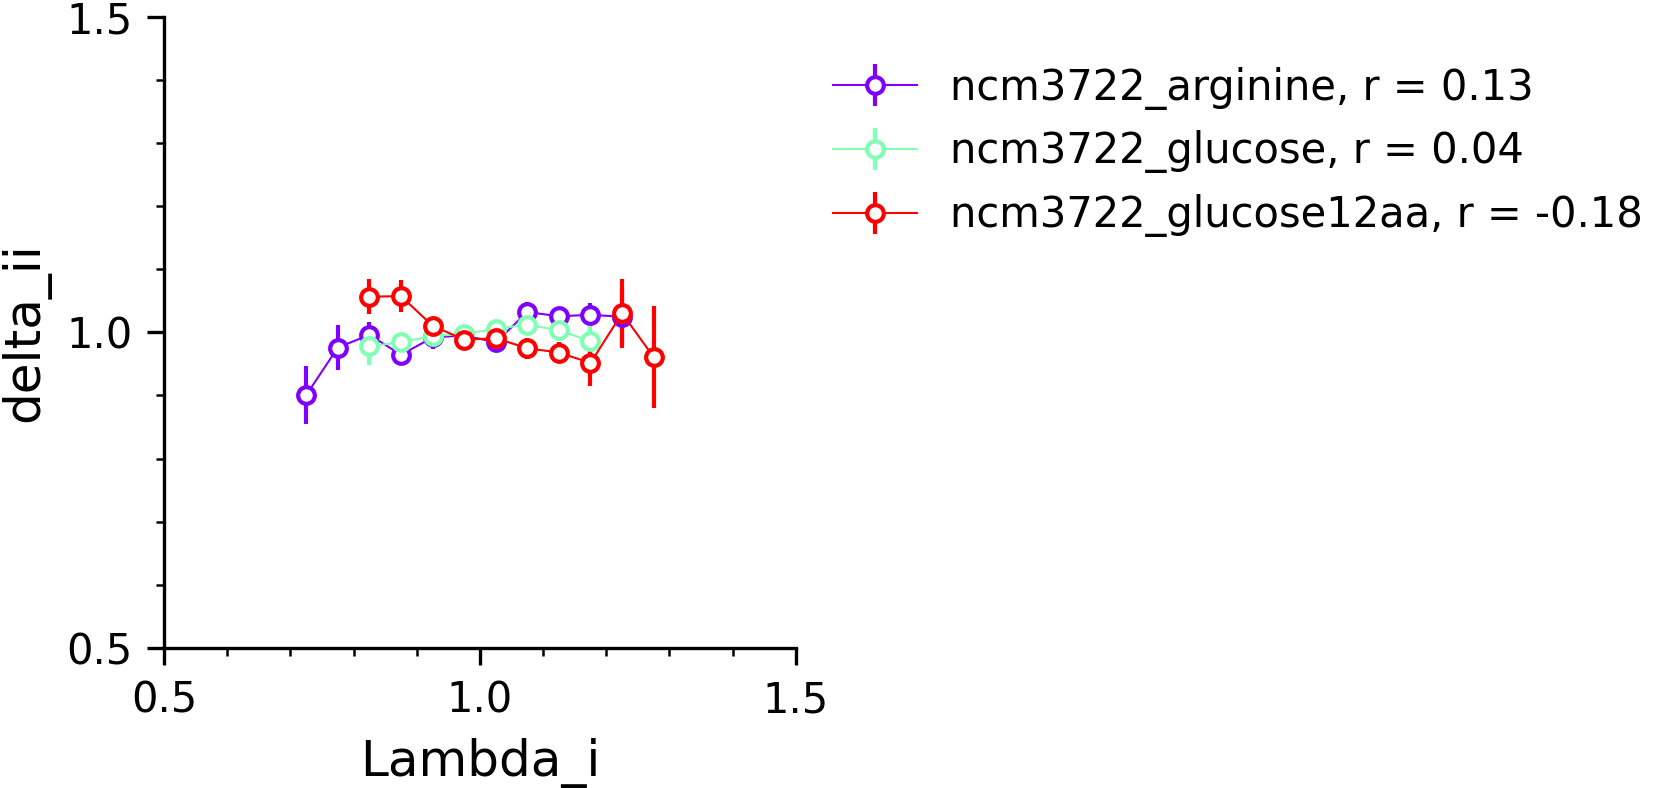

In [19]:
# display one of the previous figures
Image(filename=fpath+'.png') 

In [20]:
binw = 0.05
x0 = 0.5
x1 = 1.5
figsize=(8,3)
ms=4
show='left'

fig=plot_2varcorr_overlay(dataframes, names, field_x=field_x, field_y=field_y, \
                          figsize=figsize, normalize=True, show=show, \
                                  binw_dict=binw, x0=x0, x1=x1, ms=ms)

fname = "LAi_delta_ii_overlay_{:s}".format(show)
fpath = "{:s}_{:s}".format(fpath_base, fname)
for ext in ext_list:
    fig.savefig(fpath+ext, dpi=300, bbox_inches='tight', pad_inches=0)
    print("Saved figure in {:s}".format(fpath+ext))
#     fig.clf()
plt.close('all')

binw = 0.0500
binw = 0.0500
binw = 0.0500
Saved figure in figures/LAi_delta_ii_correlation/ncm_LAi_delta_ii_overlay_left.png
Saved figure in figures/LAi_delta_ii_correlation/ncm_LAi_delta_ii_overlay_left.svg


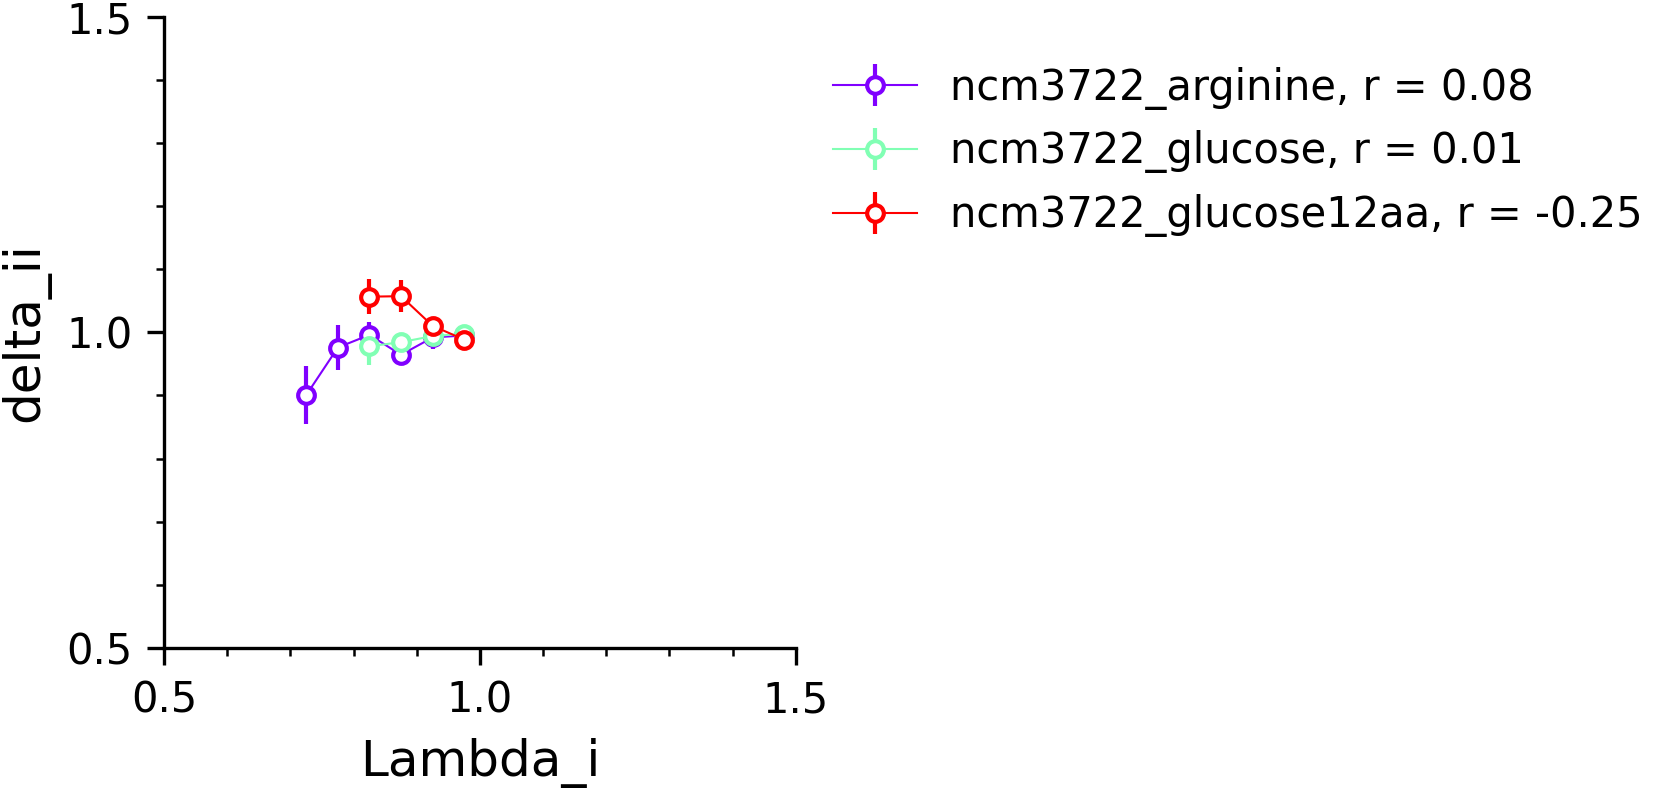

In [21]:
# display one of the previous figures
Image(filename=fpath+'.png') 

In [22]:
binw = 0.05
x0 = 0.5
x1 = 1.5
figsize=(8,3)
ms=4
show='right'

fig=plot_2varcorr_overlay(dataframes, names, field_x=field_x, field_y=field_y, \
                          figsize=figsize, normalize=True, show=show, \
                                  binw_dict=binw, x0=x0, x1=x1, ms=ms)

fname = "LAi_delta_ii_overlay_{:s}".format(show)
fpath = "{:s}_{:s}".format(fpath_base, fname)
for ext in ext_list:
    fig.savefig(fpath+ext, dpi=300, bbox_inches='tight', pad_inches=0)
    print("Saved figure in {:s}".format(fpath+ext))
#     fig.clf()
plt.close('all')

binw = 0.0500
binw = 0.0500
binw = 0.0500
Saved figure in figures/LAi_delta_ii_correlation/ncm_LAi_delta_ii_overlay_right.png
Saved figure in figures/LAi_delta_ii_correlation/ncm_LAi_delta_ii_overlay_right.svg


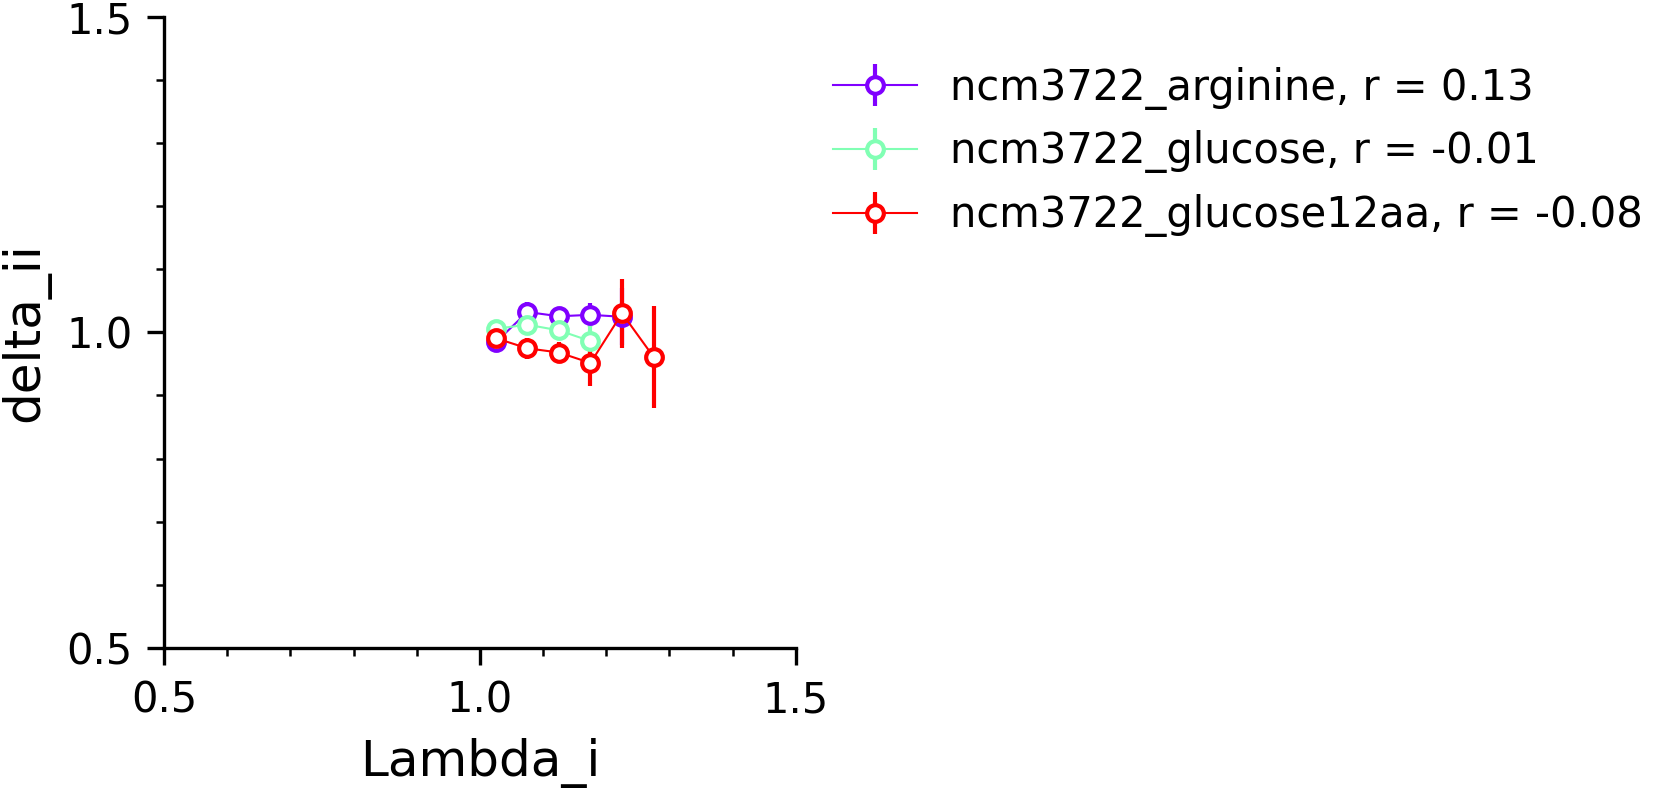

In [23]:
# display one of the previous figures
Image(filename=fpath+'.png') 

## plot BW

In [24]:
fpath_base = os.path.join(fig_dir,'bw')

names = [ \
         'bw25113_glucose', \
         'bw25113_glucose_uracil', \
        ]

dataframes = []
for name in names:
    fpath = os.path.join(direxp,name,'colidata.pkl')
    colidata = pd.read_pickle(fpath)

    colidata['lambda'] = colidata['lambda']*60
    ncells = len(colidata)
    print("ncells = {:d}".format(ncells))

    dataframes.append(colidata)

ncells = 499
ncells = 500


In [25]:
binw = 0.05
x0 = 0.5
x1 = 1.5
figsize=(8,3)
ms=4
show='all'

fig=plot_2varcorr_overlay(dataframes, names, field_x=field_x, field_y=field_y, \
                          figsize=figsize, normalize=True, show=show, \
                                  binw_dict=binw, x0=x0, x1=x1, ms=ms)

fname = "LAi_delta_ii_overlay_{:s}".format(show)
fpath = "{:s}_{:s}".format(fpath_base, fname)
for ext in ext_list:
    fig.savefig(fpath+ext, dpi=300, bbox_inches='tight', pad_inches=0)
    print("Saved figure in {:s}".format(fpath+ext))
#     fig.clf()
plt.close('all')

binw = 0.0500
binw = 0.0500
Saved figure in figures/LAi_delta_ii_correlation/bw_LAi_delta_ii_overlay_all.png
Saved figure in figures/LAi_delta_ii_correlation/bw_LAi_delta_ii_overlay_all.svg


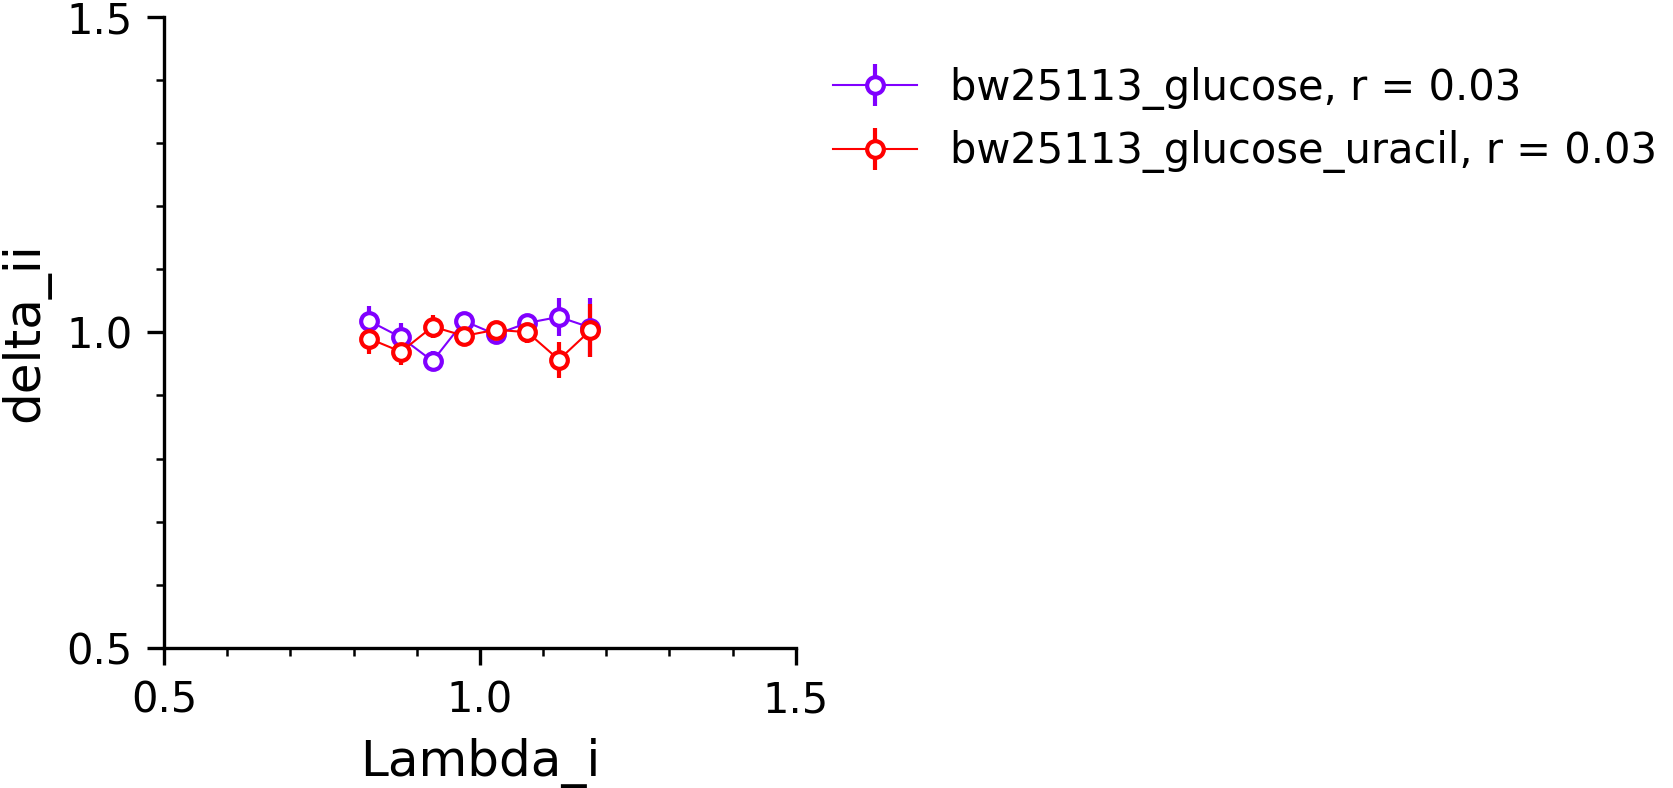

In [26]:
# display one of the previous figures
Image(filename=fpath+'.png') 

In [27]:
binw = 0.05
x0 = 0.5
x1 = 1.5
figsize=(8,3)
ms=4
show='left'

fig=plot_2varcorr_overlay(dataframes, names, field_x=field_x, field_y=field_y, \
                          figsize=figsize, normalize=True, show=show, \
                                  binw_dict=binw, x0=x0, x1=x1, ms=ms)

fname = "LAi_delta_ii_overlay_{:s}".format(show)
fpath = "{:s}_{:s}".format(fpath_base, fname)
for ext in ext_list:
    fig.savefig(fpath+ext, dpi=300, bbox_inches='tight', pad_inches=0)
    print("Saved figure in {:s}".format(fpath+ext))
#     fig.clf()
plt.close('all')

binw = 0.0500
binw = 0.0500
Saved figure in figures/LAi_delta_ii_correlation/bw_LAi_delta_ii_overlay_left.png
Saved figure in figures/LAi_delta_ii_correlation/bw_LAi_delta_ii_overlay_left.svg


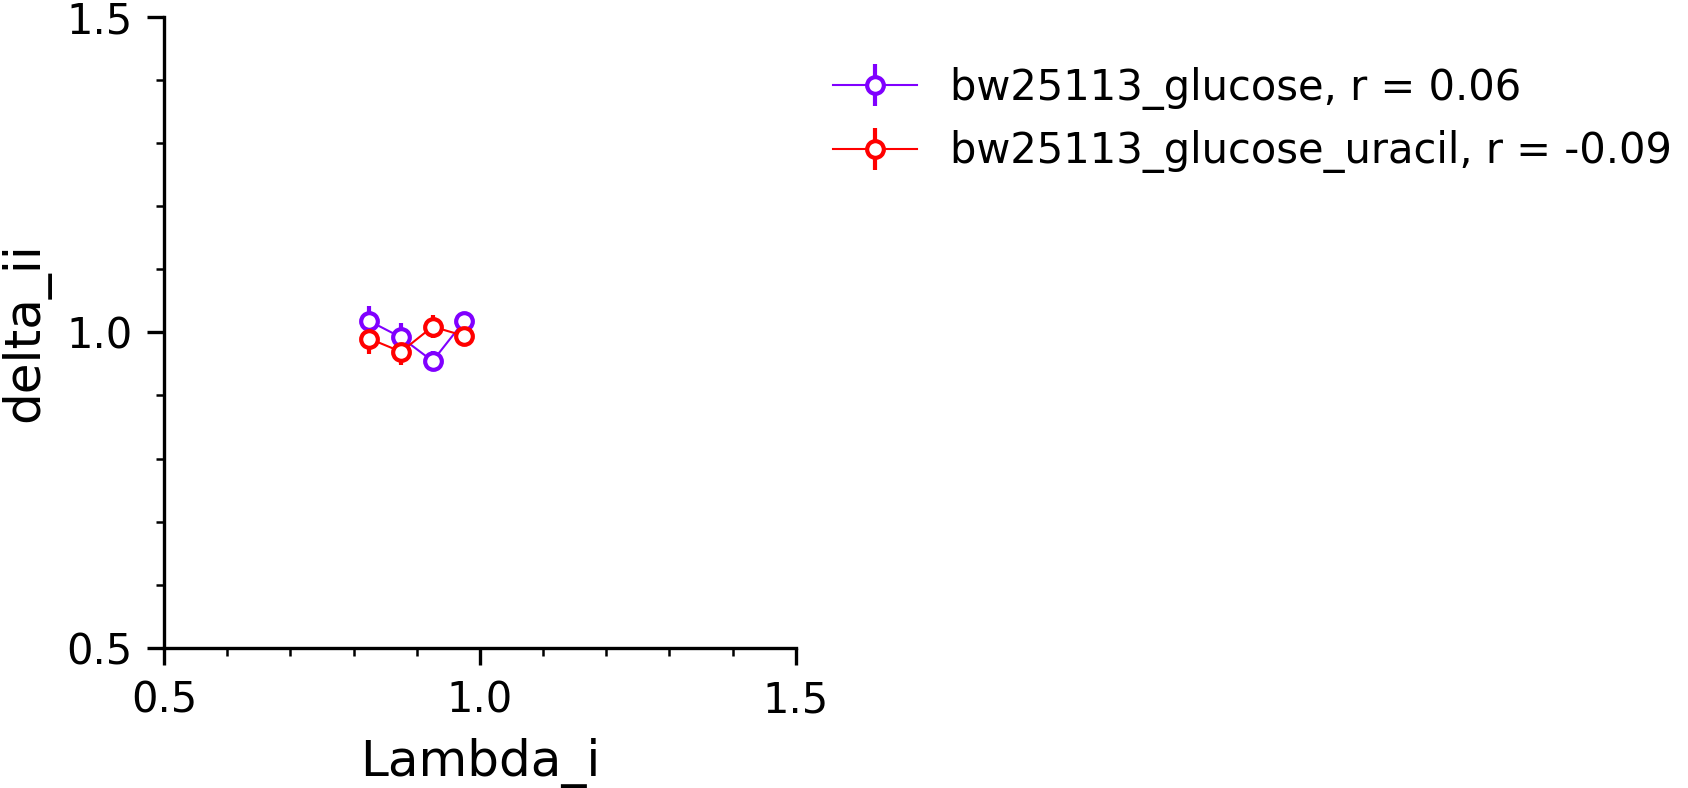

In [28]:
# display one of the previous figures
Image(filename=fpath+'.png') 

In [29]:
binw = 0.05
x0 = 0.5
x1 = 1.5
figsize=(8,3)
ms=4
show='right'

fig=plot_2varcorr_overlay(dataframes, names, field_x=field_x, field_y=field_y, \
                          figsize=figsize, normalize=True, show=show, \
                                  binw_dict=binw, x0=x0, x1=x1, ms=ms)

fname = "LAi_delta_ii_overlay_{:s}".format(show)
fpath = "{:s}_{:s}".format(fpath_base, fname)
for ext in ext_list:
    fig.savefig(fpath+ext, dpi=300, bbox_inches='tight', pad_inches=0)
    print("Saved figure in {:s}".format(fpath+ext))
#     fig.clf()
plt.close('all')

binw = 0.0500
binw = 0.0500
Saved figure in figures/LAi_delta_ii_correlation/bw_LAi_delta_ii_overlay_right.png
Saved figure in figures/LAi_delta_ii_correlation/bw_LAi_delta_ii_overlay_right.svg


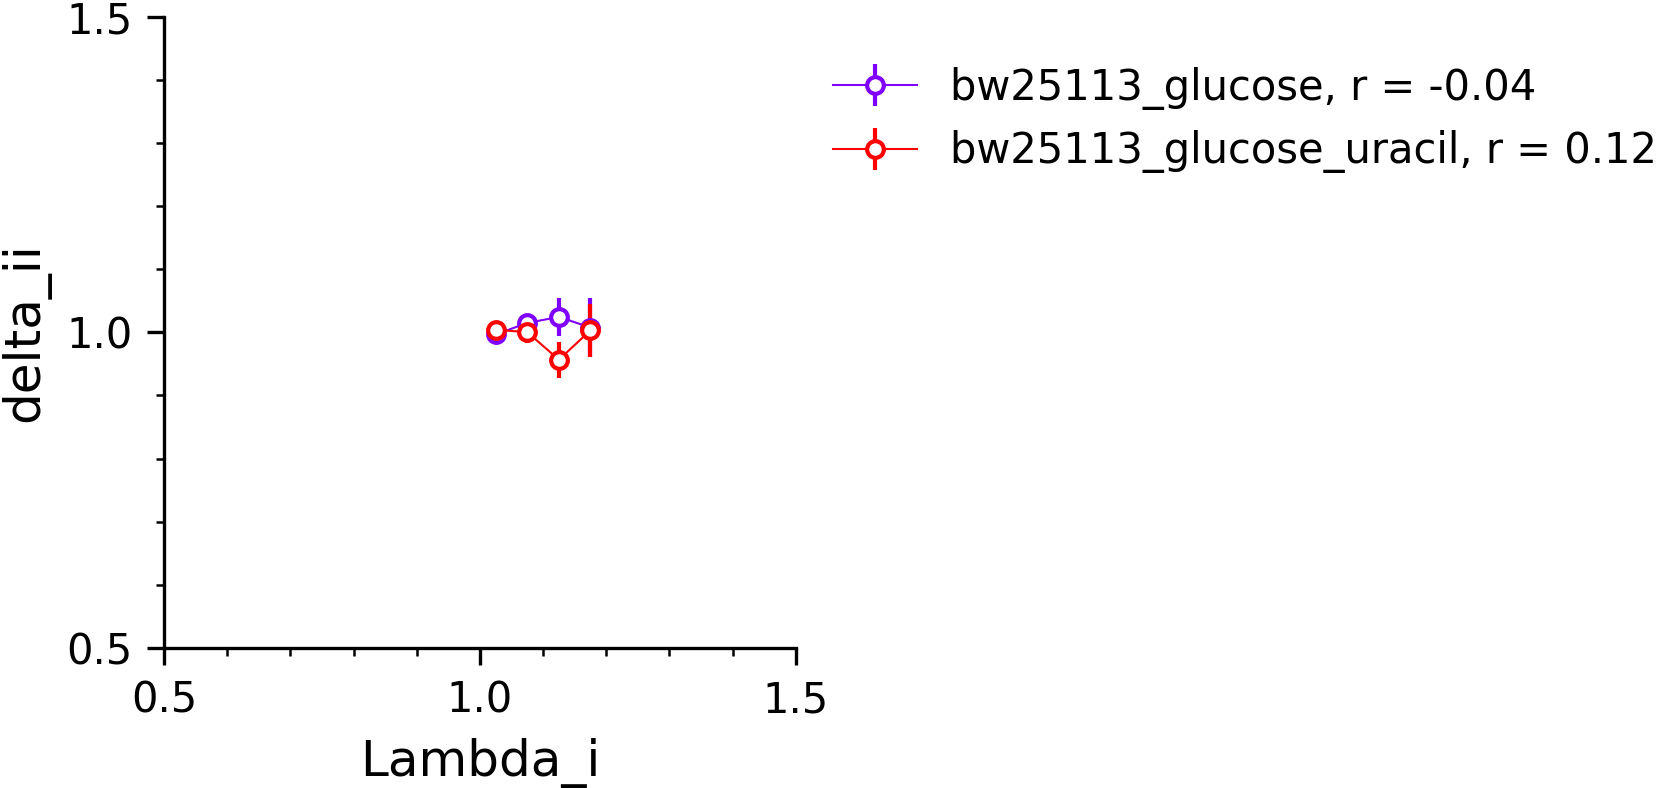

In [30]:
# display one of the previous figures
Image(filename=fpath+'.png') 

## plot B. subtilis

In [31]:
fpath_base = os.path.join(fig_dir,'bsub')

names = [ \
         'jh642_mannose', \
         '3610_gly', \
         '3610_man', \
         '3610_suc' \
        ]

dataframes = []
for name in names:
    fpath = os.path.join(direxp,name,'colidata.pkl')
    colidata = pd.read_pickle(fpath)

    colidata['lambda'] = colidata['lambda']*60
    ncells = len(colidata)
    print("ncells = {:d}".format(ncells))

    dataframes.append(colidata)
    

ncells = 623
ncells = 2355
ncells = 5478
ncells = 2530


In [32]:
binw = 0.05
x0 = 0.5
x1 = 1.5
figsize=(8,3)
ms=4
show='all'

fig=plot_2varcorr_overlay(dataframes, names, field_x=field_x, field_y=field_y, \
                          figsize=figsize, normalize=True, show=show, \
                                  binw_dict=binw, x0=x0, x1=x1, ms=ms)

fname = "LAi_delta_ii_overlay_{:s}".format(show)
fpath = "{:s}_{:s}".format(fpath_base, fname)
for ext in ext_list:
    fig.savefig(fpath+ext, dpi=300, bbox_inches='tight', pad_inches=0)
    print("Saved figure in {:s}".format(fpath+ext))
#     fig.clf()
plt.close('all')

binw = 0.0500
binw = 0.0500
binw = 0.0500
binw = 0.0500
Saved figure in figures/LAi_delta_ii_correlation/bsub_LAi_delta_ii_overlay_all.png
Saved figure in figures/LAi_delta_ii_correlation/bsub_LAi_delta_ii_overlay_all.svg


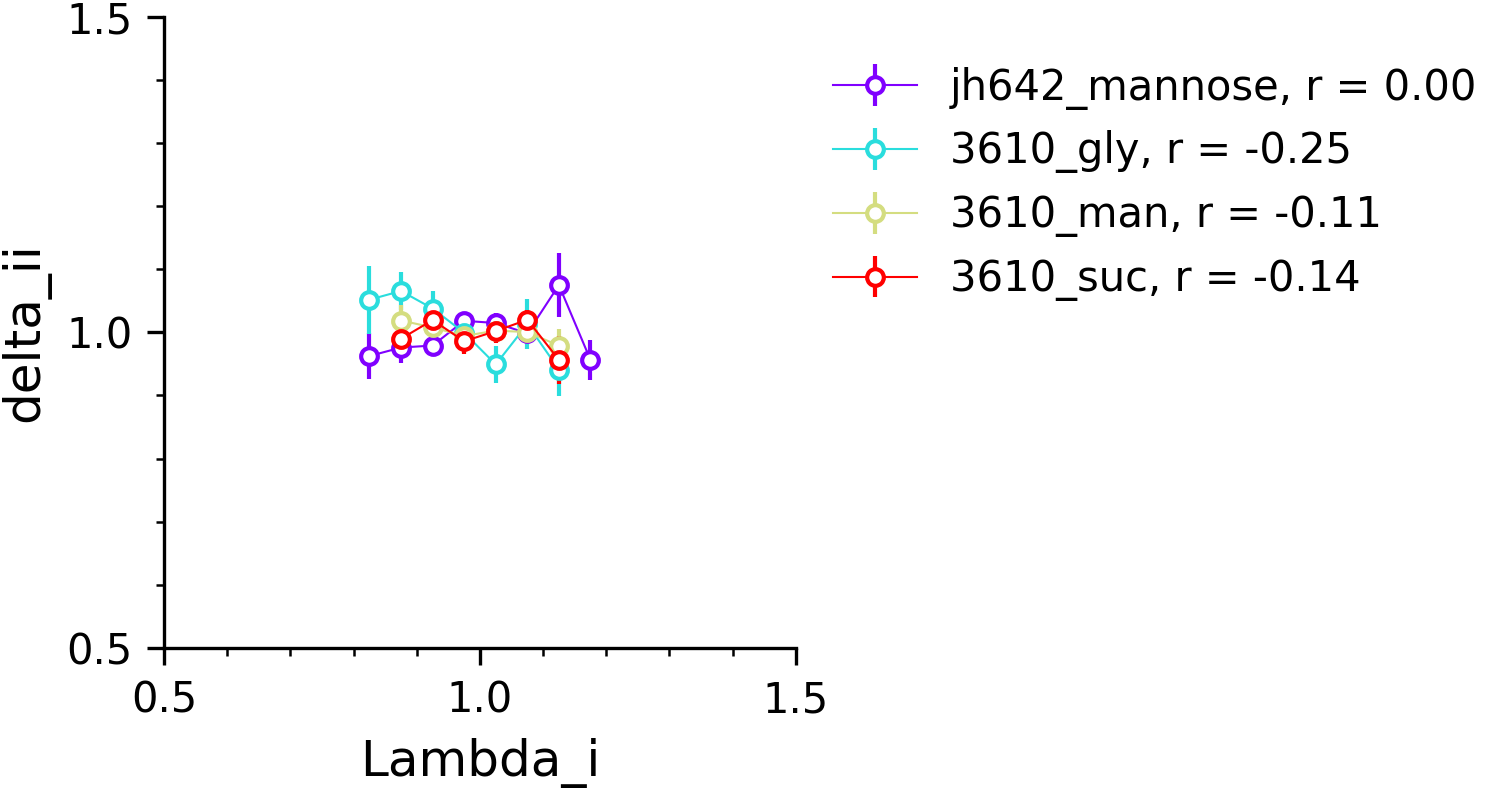

In [33]:
# display one of the previous figures
Image(filename=fpath+'.png') 

In [34]:
binw = 0.05
x0 = 0.5
x1 = 1.5
figsize=(8,3)
ms=4
show='left'

fig=plot_2varcorr_overlay(dataframes, names, field_x=field_x, field_y=field_y, \
                          figsize=figsize, normalize=True, show=show, \
                                  binw_dict=binw, x0=x0, x1=x1, ms=ms)

fname = "LAi_delta_ii_overlay_{:s}".format(show)
fpath = "{:s}_{:s}".format(fpath_base, fname)
for ext in ext_list:
    fig.savefig(fpath+ext, dpi=300, bbox_inches='tight', pad_inches=0)
    print("Saved figure in {:s}".format(fpath+ext))
#     fig.clf()
plt.close('all')

binw = 0.0500
binw = 0.0500
binw = 0.0500
binw = 0.0500
Saved figure in figures/LAi_delta_ii_correlation/bsub_LAi_delta_ii_overlay_left.png
Saved figure in figures/LAi_delta_ii_correlation/bsub_LAi_delta_ii_overlay_left.svg


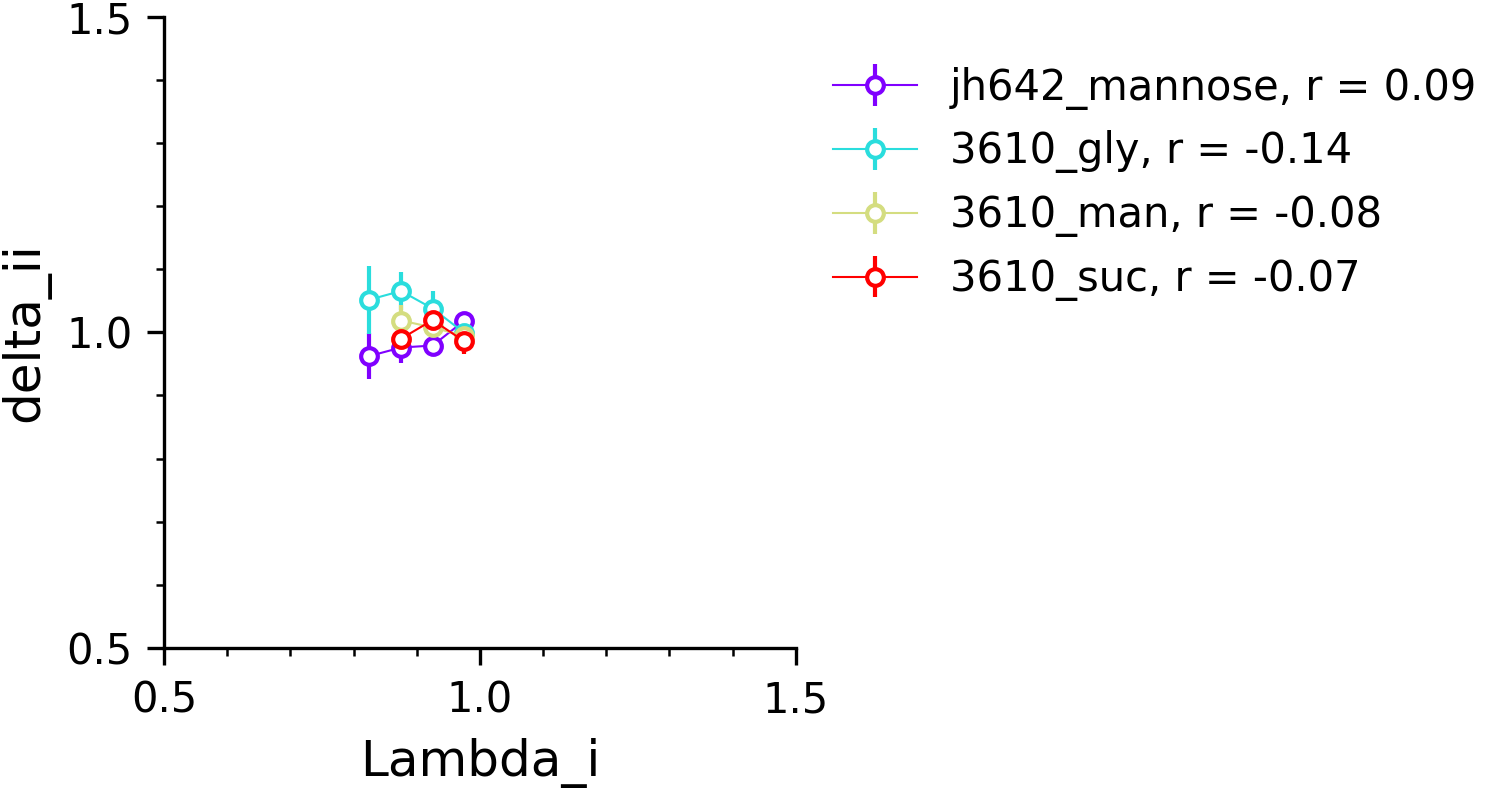

In [35]:
# display one of the previous figures
Image(filename=fpath+'.png') 

In [36]:
binw = 0.05
x0 = 0.5
x1 = 1.5
figsize=(8,3)
ms=4
show='right'

fig=plot_2varcorr_overlay(dataframes, names, field_x=field_x, field_y=field_y, \
                          figsize=figsize, normalize=True, show=show, \
                                  binw_dict=binw, x0=x0, x1=x1, ms=ms)

fname = "LAi_delta_ii_overlay_{:s}".format(show)
fpath = "{:s}_{:s}".format(fpath_base, fname)
for ext in ext_list:
    fig.savefig(fpath+ext, dpi=300, bbox_inches='tight', pad_inches=0)
    print("Saved figure in {:s}".format(fpath+ext))
#     fig.clf()
plt.close('all')

binw = 0.0500
binw = 0.0500
binw = 0.0500
binw = 0.0500
Saved figure in figures/LAi_delta_ii_correlation/bsub_LAi_delta_ii_overlay_right.png
Saved figure in figures/LAi_delta_ii_correlation/bsub_LAi_delta_ii_overlay_right.svg


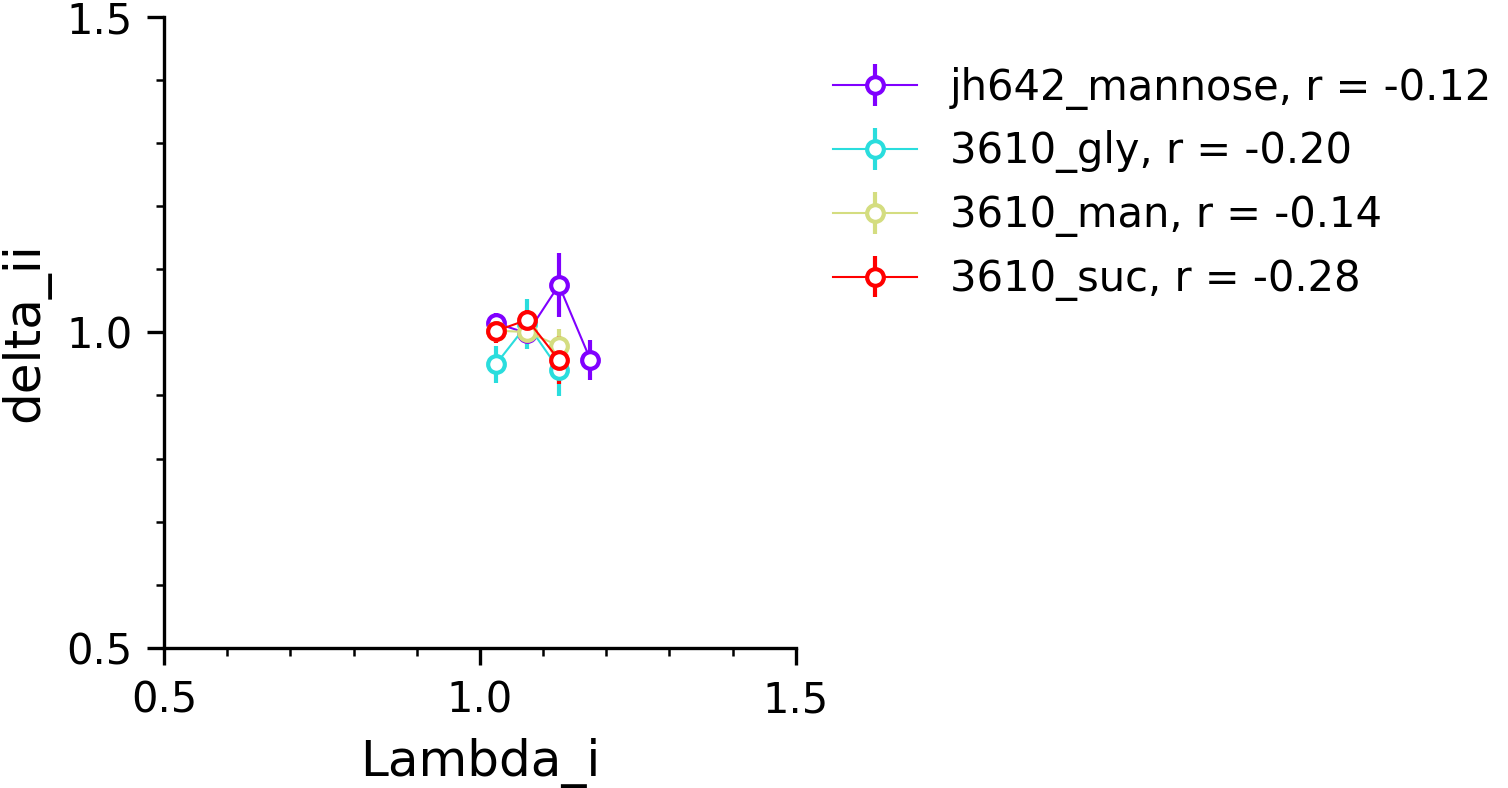

In [37]:
# display one of the previous figures
Image(filename=fpath+'.png') 

## plot Witz et al

In [38]:
fpath_base = os.path.join(fig_dir,'witz')

names = [
         'glycerol', \
         'glucose', \
         'glucose8aa', \
         'glycerolauto' \
        ]

dataframes = []
for name in names:
    fpath = os.path.join(direxp,name,'colidata.pkl')
    colidata = pd.read_pickle(fpath)

    colidata['lambda'] = colidata['lambda']*60
    ncells = len(colidata)
    print("ncells = {:d}".format(ncells))

    dataframes.append(colidata)

ncells = 865
ncells = 1094
ncells = 1251
ncells = 3018


In [39]:
binw = 0.05
x0 = 0.5
x1 = 1.5
figsize=(8,3)
ms=4
show='all'

fig=plot_2varcorr_overlay(dataframes, names, field_x=field_x, field_y=field_y, \
                          figsize=figsize, normalize=True, show=show, \
                                  binw_dict=binw, x0=x0, x1=x1, ms=ms)

fname = "LAi_delta_ii_overlay_{:s}".format(show)
fpath = "{:s}_{:s}".format(fpath_base, fname)
for ext in ext_list:
    fig.savefig(fpath+ext, dpi=300, bbox_inches='tight', pad_inches=0)
    print("Saved figure in {:s}".format(fpath+ext))
#     fig.clf()
plt.close('all')

binw = 0.0500
binw = 0.0500
binw = 0.0500
binw = 0.0500
Saved figure in figures/LAi_delta_ii_correlation/witz_LAi_delta_ii_overlay_all.png
Saved figure in figures/LAi_delta_ii_correlation/witz_LAi_delta_ii_overlay_all.svg


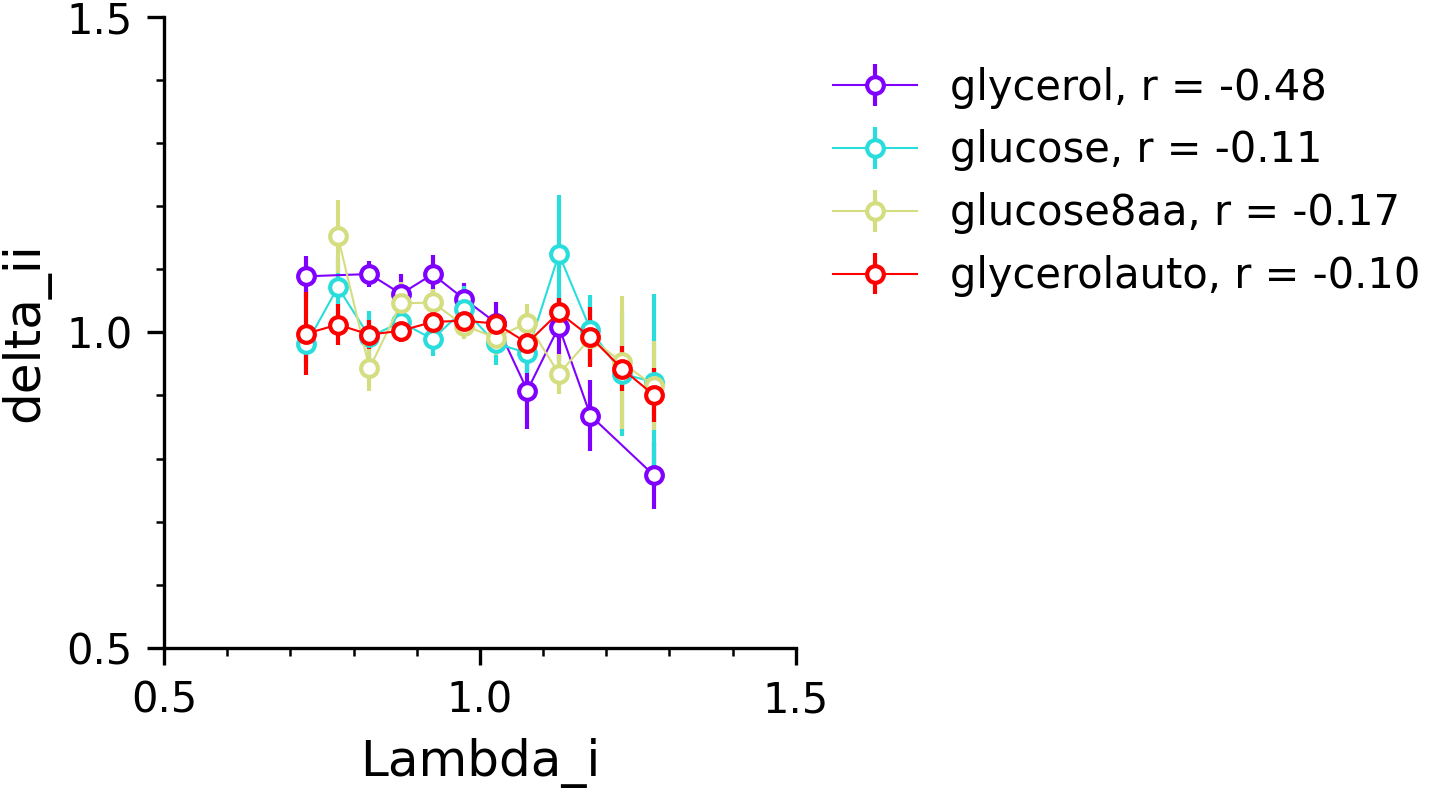

In [40]:
# display one of the previous figures
Image(filename=fpath+'.png') 

In [41]:
binw = 0.05
x0 = 0.5
x1 = 1.5
figsize=(8,3)
ms=4
show='left'

fig=plot_2varcorr_overlay(dataframes, names, field_x=field_x, field_y=field_y, \
                          figsize=figsize, normalize=True, show=show, \
                                  binw_dict=binw, x0=x0, x1=x1, ms=ms)

fname = "LAi_delta_ii_overlay_{:s}".format(show)
fpath = "{:s}_{:s}".format(fpath_base, fname)
for ext in ext_list:
    fig.savefig(fpath+ext, dpi=300, bbox_inches='tight', pad_inches=0)
    print("Saved figure in {:s}".format(fpath+ext))
#     fig.clf()
plt.close('all')

binw = 0.0500
binw = 0.0500
binw = 0.0500
binw = 0.0500
Saved figure in figures/LAi_delta_ii_correlation/witz_LAi_delta_ii_overlay_left.png
Saved figure in figures/LAi_delta_ii_correlation/witz_LAi_delta_ii_overlay_left.svg


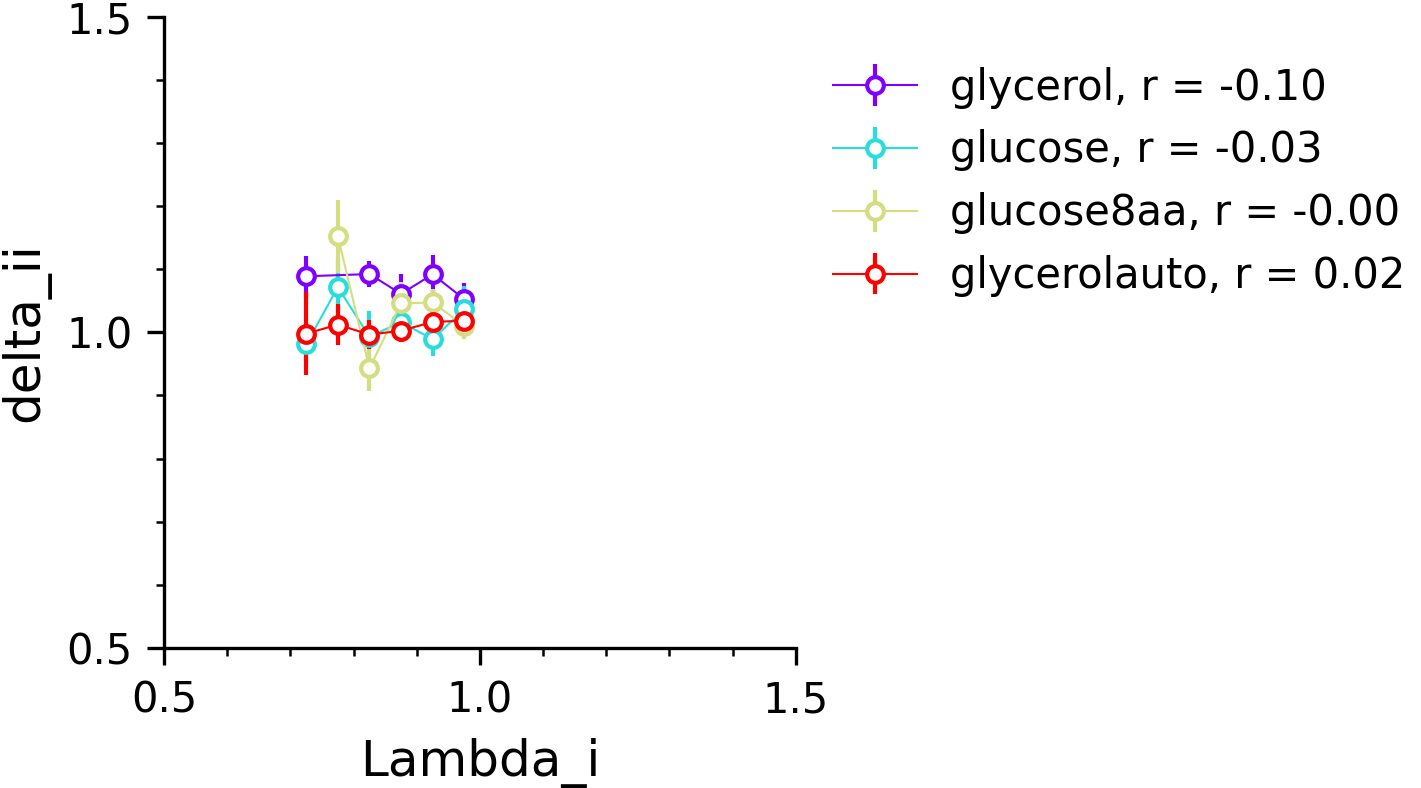

In [42]:
# display one of the previous figures
Image(filename=fpath+'.png') 

In [43]:
binw = 0.05
x0 = 0.5
x1 = 1.5
figsize=(8,3)
ms=4
show='right'

fig=plot_2varcorr_overlay(dataframes, names, field_x=field_x, field_y=field_y, \
                          figsize=figsize, normalize=True, show=show, \
                                  binw_dict=binw, x0=x0, x1=x1, ms=ms)

fname = "LAi_delta_ii_overlay_{:s}".format(show)
fpath = "{:s}_{:s}".format(fpath_base, fname)
for ext in ext_list:
    fig.savefig(fpath+ext, dpi=300, bbox_inches='tight', pad_inches=0)
    print("Saved figure in {:s}".format(fpath+ext))
#     fig.clf()
plt.close('all')

binw = 0.0500
binw = 0.0500
binw = 0.0500
binw = 0.0500
Saved figure in figures/LAi_delta_ii_correlation/witz_LAi_delta_ii_overlay_right.png
Saved figure in figures/LAi_delta_ii_correlation/witz_LAi_delta_ii_overlay_right.svg


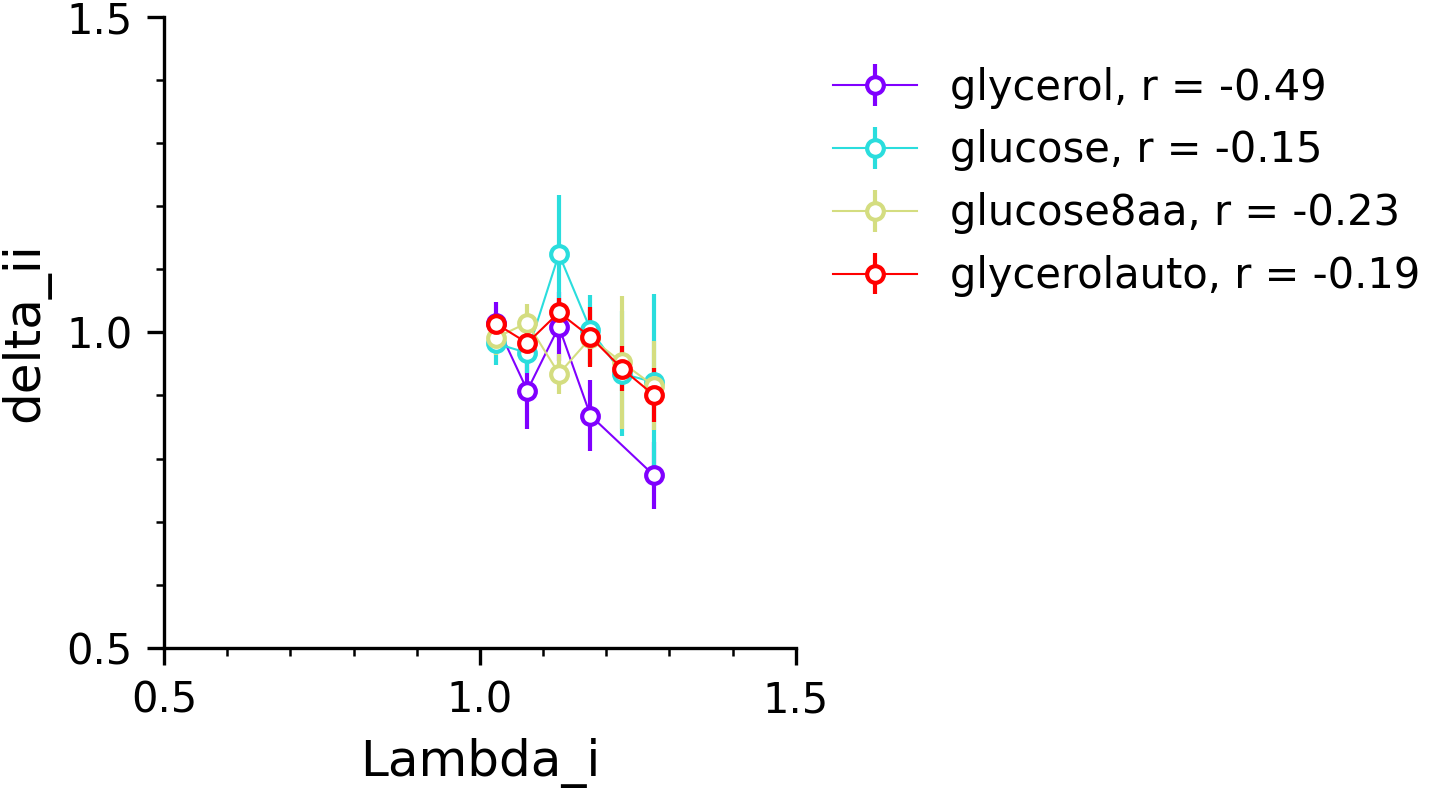

In [44]:
# display one of the previous figures
Image(filename=fpath+'.png') 